In [1]:
import pandas as pd
import os
import glob
import numpy as np
import itertools as IT
import csv
import csv as cv 
import matplotlib.pyplot as plt
from pathlib import Path
import tkinter
import tkinter.filedialog
from numpy import genfromtxt
from pathlib import Path
import torch
import torchvision
from pylab import *
import pylab as p
import itertools
from itertools import product
from collections import Counter

In [2]:
pwd

'C:\\Users\\makn0023\\Desktop\\Thesis\\Notebooks'

In [4]:
path = 'C:\\Users\\makn0023\\Desktop\\Thesis\\datalodlong'
os.chdir(path)

In [5]:
df0_0001 = pd.DataFrame()
for f in glob.glob('LOD_0_0.0001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df0_0001 = df0_0001.append(a)
df0_0001=df0_0001.reset_index()

In [6]:
df0_0001s = df0_0001[['score','0_0','0_1','0_2','0_3','1_0','1_1','1_2','1_3','2_0','2_1','2_2','2_3','3_0','3_1','3_2','3_3']]
df0_0001r=df0_0001[['reward_0_0','reward_0_1','reward_0_2','reward_0_3','reward_1_0','reward_1_1','reward_1_2','reward_1_3','reward_2_0','reward_2_1','reward_2_2','reward_2_3','reward_3_0','reward_3_1','reward_3_2','reward_3_3']]
df0_0001s['new_s']=(df0_0001s.iloc[:,0]/df0_0001s.iloc[:,1:17].sum(axis=1)).fillna(0)

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df0_0001 = pd.DataFrame()
for f in glob.glob('LOD_0_0.0001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df.tail(1)
    df0_0001 = df0_0001.append(a)
df0_0001=df0_0001.reset_index()

In [8]:
ar_0=[]
for i in range(len(df0_0001r)):
    ab = df0_0001r.iloc[i]
    ar_0.append(ab)
ar_0 = np.asarray(ar_0)

In [11]:
df0_0001r

reward_0_0  reward_0_1  reward_0_2  reward_0_3  reward_1_0  reward_1_1  \
0        0.948589    0.121527    0.894900   -0.213589    0.293781   -0.827306   
1        0.948603    0.121453    0.894962   -0.213650    0.293855   -0.827272   
2        0.949324    0.114051    0.901092   -0.219708    0.301285   -0.823912   
3        0.948791    0.106621    0.907048   -0.225798    0.308696   -0.820599   
4        0.947014    0.099174    0.912785   -0.231925    0.316074   -0.817331   
...           ...         ...         ...         ...         ...         ...   
32326    0.106225    0.716830   -0.426407   -0.356252    0.195671   -0.897863   
32327    0.099431    0.712226   -0.421177   -0.359393    0.187476   -0.904533   
32328    0.092634    0.707578   -0.415980   -0.362524    0.179265   -0.910960   
32329    0.085843    0.702892   -0.410813   -0.365645    0.171018   -0.917082   
32330    0.079067    0.698172   -0.405673   -0.368757    0.162718   -0.922835   

       reward_1_2  reward_1_3  reward_2_0  reward_2_1  reward_2_2  reward_2_3  \
0        0.355103    0.897076   -0.140653    0.105385    0.768978   -0.743998   
1        0.355026    0.897027   -0.140735    0.105296    0.769030   -0.743950   
2        0.347376    0.892158   -0.148927    0.096364    0.774169   -0.739144   
3        0.339655    0.887222   -0.157049    0.087433    0.779308   -0.734272   
4        0.331861    0.882239   -0.165103    0.078525    0.784466   -0.729331   
...           ...         ...         ...         ...         ...         ...   
32326   -0.754018   -0.685309    0.260196   -0.366885    0.616190    0.766941   
32327   -0.750361   -0.678726    0.254672   -0.373036    0.621577    0.773273   
32328   -0.746669   -0.672144    0.249178   -0.379163    0.627020    0.779598   
32329   -0.742940   -0.665578    0.243716   -0.385276    0.632521    0.785956   
32330   -0.739172   -0.659043    0.238287   -0.391385    0.638081    0.792384   

       reward_3_0  reward_3_1  reward_3_2  reward_3_3  
0        0.495507    0.059941    0.881297    0.542744  
1        0.495456    0.060024    0.881398    0.542683  
2        0.490315    0.068349    0.891392    0.536559  
3        0.485169    0.076727    0.901126    0.530374  
4        0.480022    0.085147    0.910428    0.524130  
...           ...         ...         ...         ...  
32326    0.396940   -0.829518   -0.648239   -0.146053  
32327    0.391005   -0.823689   -0.655898   -0.154947  
32328    0.385076   -0.817999   -0.663630   -0.163760  
32329    0.379142   -0.812441   -0.671412   -0.172501  
32330    0.373195   -0.807009   -0.679220   -0.181187  

[32331 rows x 16 columns]

In [10]:
shape(ar_0)

(32331, 16)

In [17]:
def computeNewScore(eatenM,scoreM,scores):    
    allScores = []
    score = []
    percentRank = []
    for i in range(len(eatenM)):
        gf = []
        for j in range(len(scoreM)):
            g=(eatenM[i].flatten()*scoreM[j].flatten()).sum()
            gf.append(g)
        allScores.append(gf)
    for i in range(len(scores)):
        c = (scores.loc[i])
        score.append(c)
    for k in range(len(score)):
        for m in range(len(allScores)):
            Rank=(allScores[m]>score[k]).sum()/len(allScores[m])
            percentRank.append(Rank)
    return percentRank, allScores

In [18]:
abcd = computeNewScore(ar_0,zc,df0_0001s.new_s)

KeyboardInterrupt: 

In [22]:
allScores = []
score = []
percentRank = []
for i in range(len(ar_0)):
    gf = []
    for j in range(len(zc)):
        g=(ar_0[i].flatten()*zc[j].flatten()).sum()
        gf.append(g)
    allScores.append(gf)
for i in range(len(df0_0001s.new_s)):
    c = (df0_0001s.new_s.loc[i])
    score.append(c)

KeyboardInterrupt: 

In [24]:
score

[]

In [5]:
df0_0001s = df0_0001[['score','0_0','0_1','0_2','0_3','1_0','1_1','1_2','1_3','2_0','2_1','2_2','2_3','3_0','3_1','3_2','3_3']]
df0_0001r=df0_0001[['reward_0_0','reward_0_1','reward_0_2','reward_0_3','reward_1_0','reward_1_1','reward_1_2','reward_1_3','reward_2_0','reward_2_1','reward_2_2','reward_2_3','reward_3_0','reward_3_1','reward_3_2','reward_3_3']]
df0_0001s['new_s']=(df0_0001s.iloc[:,0]/df0_0001s.iloc[:,1:17].sum(axis=1)).fillna(0)

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
ar_0=[]
for i in range(len(df0_0001r)):
    ab = df0_0001r.iloc[i]
    ar_0.append(ab)
ar_0 = np.asarray(ar_0)

In [24]:
len(ar_0)

32331

In [4]:
ab = []
for i in itertools.product([0,1,2,3], repeat=8):
    ab.append(i)

In [6]:
len(ab)

65536

In [16]:
zc = []
for i in itertools.product([0,1,2,3], repeat=8):
    M = np.zeros((4,4))
    M[i[0]][i[0]] += 1.0
    for j in range(7):
        M[i[j]][i[j+1]] += 1.0
    if np.random.random()<1:
        #print(i)
        M = M.astype(float)
        M1 = M.sum().astype(float)
        M2 = M/M1 #(M / M.sum(axis = 1, keepdims = True)).astype(float)
#         print(i)
#         print(M)
        zc.append(M2)

[[8. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[7. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[7. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[7. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[6. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[6. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[6. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[6. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[6. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[6. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[6. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[6. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[6. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[6. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[6. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[6. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[6. 1. 0. 0.]
 [1. 0. 0

[[4. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[4. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 2. 0. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 2. 0. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 2. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[3. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[3. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[3. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[3. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[4. 1. 0. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 2. 0. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [1. 2. 0

 [0. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[4. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[3. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[3. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[3. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[3. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 

[[3. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 1.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 3.]]
[[6. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[5. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[5. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[5. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[4. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[4. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[4. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[4. 1. 0. 1.]
 [0. 0. 0

[[3. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[4. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[3. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[3. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[3. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[3. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[3. 0. 0. 1.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[3. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[3. 0. 0. 1.]
 [0. 1. 0

[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[3. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]]
[[2. 1. 0. 1.]
 [1. 0. 0

 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[3. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 2. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[2. 1. 

 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 1.]]
[[3. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 2. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]
[[2. 1. 

[[2. 1. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 0.]
 [0. 0. 2. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[3. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 2. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 0

[[2. 1. 1. 0.]
 [0. 1. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[3. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 2. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 1.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 1

 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]]
[[4. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 

 [0. 1. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]]
[[4. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 

[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 2. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 2. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 2.]]
[[4. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[3. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[2. 0. 2. 0.]
 [0. 0. 0

 [2. 0. 0. 0.]]
[[2. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[2. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[3. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 2. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 3. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[2. 1. 

 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 2. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 1. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 0. 0. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 0. 

[[3. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[3. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 2. 0.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[3. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 2. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 1.]
 [0. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 1

[[2. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 2. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0

[[2. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 3. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[2. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[3. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [1. 0. 1

[[2. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[3. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 3. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 1

 [1. 0. 0. 1.]]
[[2. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]]
[[4. 2. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 3. 

 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[2. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 2. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 2. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 2.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 

 [0. 1. 0. 0.]]
[[1. 1. 0. 2.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 2.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 1. 0. 2.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 2.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 2. 0. 1.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 1.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 2.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [2. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 3. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 

[[1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 1. 0.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [2. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 3. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 0

[[1. 1. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 3. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 0

 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 2.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[1. 1. 

[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 2.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 2. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]]
[[3. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 2. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 1. 0

 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[1. 2. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 2. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 2.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[1. 1. 

 [1. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 1.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 

 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 2.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 0. 2.]]
[[3. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 

 [0. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 2.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 2. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 2.]]
[[1. 1. 

[[1. 1. 1. 0.]
 [2. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 2. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 2.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [2. 0. 0

[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 2. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]]
[[3. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 2. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 2. 0. 0.]
 [2. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 2. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 2. 0. 0.]
 [1. 0. 0. 2.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 0

 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 

 [0. 0. 0. 0.]]
[[2. 1. 2. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 2. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 3. 0.]
 [0. 0. 0. 0.]
 [3. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 3. 0.]
 [0. 0. 0. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 3. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 3. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[3. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 3. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [0. 2. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 

 [0. 0. 0. 0.]]
[[1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 2. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 2. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 

 [0. 0. 1. 0.]]
[[1. 0. 3. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 2.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]
 [1. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]
 [0. 1. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 2. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 1. 1.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 

[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 2.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 3.]]
[[1. 0. 1. 1.]
 [0. 0. 0

[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]]
[[2. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 2. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 2.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 1.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0

 [0. 1. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 2. 1.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 3. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 0. 2.]]
[[3. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 

 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 

 [0. 0. 1. 0.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 

 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 3. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 

[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [0. 0. 0. 3.]]
[[4. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [0. 0. 0

 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 1. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 2.]]
[[1. 0. 

[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[3. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[2. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[2. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0

[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 2.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 0. 1. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0

[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 1. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 2. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 2. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 2. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0

[[3. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[3. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 2. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 2.]
 [1. 0. 0

[[1. 1. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [3. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 0.]]
[[1. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]]
[[1. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 2. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 2.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1

 [2. 0. 0. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]]
[[2. 0. 0. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [3. 0. 0. 0.]]
[[2. 0. 0. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 1. 0. 0.]]
[[2. 0. 0. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]]
[[2. 0. 0. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 2. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 1. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 3.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[1. 1. 

 [0. 2. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[3. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 0. 2. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 0. 1. 2.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 1.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 

[[1. 0. 1. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 1. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[3. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2. 0. 1. 1.]
 [0. 1. 1

 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 

[[2. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 2. 1. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0

 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 3.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[2. 0. 

 [0. 0. 2. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[3. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 

 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 2. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 3. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[1. 0. 

[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[2. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 2. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 3. 0.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 1.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 0

 [1. 0. 0. 1.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 

[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 1.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 1. 0

 [0. 0. 2. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 2. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 2. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 3. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 2.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 2. 2.]]
[[1. 0. 

[[3. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[3. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[3. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[3. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[3. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[4. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [1. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [1. 1. 0

[[1. 1. 0. 0.]
 [1. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [2. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 2. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1

 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]]
[[3. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 

[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[2. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 0.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[1. 0. 0. 1.]
 [1. 1. 0

[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [3. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 2. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0

 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 3. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 2.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 2. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [2. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 

[[0. 1. 1. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[0. 1. 0. 2.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 2. 0. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [2. 1. 0

[[0. 2. 1. 0.]
 [2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [2. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [2. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [2. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [2. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [2. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 1.]
 [2. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 1. 1.]
 [2. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [2. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [2. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [2. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 3. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 4. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 3. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 3. 0

 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [2. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [2. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 

 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]]
[[2. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 

[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0

 [1. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 0. 2.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 2.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 2.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 3.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [1. 2. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 

 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 2. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 2. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 

 [1. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 1. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 0. 3.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 0. 2.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 

[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [2. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 2. 0

 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [2. 2. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 3. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 2. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 

[[0. 0. 2. 0.]
 [1. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [2. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 2. 0

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 1.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 2.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 2. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 3. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 0. 2.]
 [1. 2. 0

 [0. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [2. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 3. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 

 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 3. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 3. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [2. 4. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 5. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 4. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 4. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 3. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 3. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 

 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 8. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 7. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 7. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 6. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 5. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 5. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 5. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 5. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 5. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 

[[0. 0. 0. 1.]
 [0. 4. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [1. 4. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 5. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 2.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 4. 0

 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 3. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 3. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 3. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 3. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 

[[0. 1. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 3.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[2. 0. 0. 0.]
 [0. 3. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 3. 0

 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [2. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 3. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 2. 2. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 3. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 

 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 3.]]
[[3. 0. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 0. 1.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [2. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 2. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 

 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 2. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 2. 2. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 3. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 

 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 2.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 

[[1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 3. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 2. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 2.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [1. 0. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 2. 1

[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 2.]]
[[1. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1

 [0. 1. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [2. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 2. 0. 0.]
 [2. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [2. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [2. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 4. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 3. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 

 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]]
[[2. 0. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [2. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 3. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 

 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 2. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 1. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 0. 2.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 3. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 

[[1. 2. 0. 0.]
 [2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 1

[[0. 1. 0. 0.]
 [0. 2. 2. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 3. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 3. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 3. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 3. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 2. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 1. 2. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 2. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 3. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2

[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 3. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 1. 1. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1

 [0. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 3. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 

 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]]
[[2. 0. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 

 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 3. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 3. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 3. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 3. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 3. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 4. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 3. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 1.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 2. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 

 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 2.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 3. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 

 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [1. 2. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 2.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [1. 2. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 3. 0. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 2. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 

[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 3. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [2. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1

 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 2. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 2. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 2.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 

[[1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 2. 2.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 1

 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 2.]
 [1. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [2. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 

 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 3. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 2. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 1. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 2.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 

[[0. 0. 0. 0.]
 [0. 3. 1. 1.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 2. 1.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 2.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 0. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 0. 1.]
 [1. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 0. 1.]
 [0. 3. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 0. 1.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1

 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 1. 0. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 2. 0. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 2.]]
[[2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 

[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]
 [1. 0. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[0. 2. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 2. 1

[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[3. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[2. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[2. 0. 0. 2.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[2. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[2. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[2. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[2. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[2. 0. 0. 1.]
 [0. 1. 0

 [1. 0. 0. 0.]]
[[0. 3. 0. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 1.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [2. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 3. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 2. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 2. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 2.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 

 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 2. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [0. 2. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 2. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 2.]
 [0. 2. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 1. 0. 0.]
 [2. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 0. 2.]
 [0. 1. 0. 0.]
 [2. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 1. 0. 2.]
 [0. 1. 0. 0.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 1. 0. 2.]
 [0. 1. 0. 0.]
 [2. 0. 0. 0.]]
[[0. 0. 

 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 3. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [2. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 

 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [2. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 3. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 2.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 2.]
 [0. 1. 0. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 

[[0. 0. 0. 0.]
 [0. 3. 1. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 3.]
 [0. 0. 0. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 2.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[2. 0. 0. 0.]
 [0. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 3. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 2

[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 3. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 3. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1

 [0. 1. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 2.]
 [0. 1. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 1. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[2. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 2. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 

 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 2. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 3.]]
[[3. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[2. 0. 

[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 2.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [2. 0. 1. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0

 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 2.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 2.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 2.]
 [0. 1. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 2.]
 [0. 0. 0. 1.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 0. 1.]
 [0. 2. 1. 0.]]
[[0. 0. 

 [1. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 2. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 3. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [2. 0. 0. 1.]]
[[0. 0. 

[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 1. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 0. 0.]
 [0. 3. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 0. 0.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 0. 0.]
 [0. 2. 0. 2.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 2.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 3.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0

 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]
 [0. 0. 1. 2.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 3. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 

[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 1.]]
[[4. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[3. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[3. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[3. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[3. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[3. 0. 0. 1.]
 [0. 0. 0

[[1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [2. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 2.]]
[[3. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 1. 0

 [1. 0. 0. 0.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [3. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 2.]]
[[3. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 

 [0. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 2. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[2. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 3. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[1. 0. 

 [0. 0. 0. 0.]]
[[1. 2. 0. 1.]
 [2. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 3. 0. 0.]
 [3. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 3. 0. 0.]
 [2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 3. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 3. 0. 0.]
 [2. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 1.]
 [2. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 1.]
 [2. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 2. 0. 1.]
 [2. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 2. 0. 1.]
 [2. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 3. 0. 0.]
 [2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 

 [0. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 2.]]
[[2. 1. 0. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [2. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 3. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 2. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 2. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 

 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 1. 1.]
 [2. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 1. 1.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 1. 1.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 1. 1.]
 [2. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [0. 0. 1. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [0. 0. 1. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [0. 0. 1. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 2. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [3. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 

[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [2. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 2.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 3.]]
[[3. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[2. 2. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [0. 1. 0

[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 1. 1.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 3. 0.]
 [0. 0. 0. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [3. 0. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [1. 0. 0. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 1. 0. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0

 [0. 0. 1. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [2. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 1. 0.]
 [2. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [2. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [2. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 2. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 

 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 2. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 3. 0.]
 [0. 0. 0. 0.]
 [3. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [3. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 1. 0. 0.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 1. 0.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 

 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 3. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [2. 0. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 2.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 

[[0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [0. 0. 1. 0.]
 [2. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [0. 0. 0. 1.]
 [2. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [3. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 2.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 2. 0

[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [2. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [2. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [2. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [2. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [2. 0. 3. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 3. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 4. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1

 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [2. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 2. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 3. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 

 [2. 0. 0. 1.]]
[[0. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [2. 0. 0. 2.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 3.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 

 [0. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [2. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [2. 2. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 3. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 

[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [2. 1. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 2. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1

[[0. 1. 1. 0.]
 [3. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 0. 0. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 0. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 1. 0.]
 [2. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [2. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [2. 2. 0

 [0. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [2. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 2. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 1.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 2. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 3. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 

 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 

 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 3. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 2. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 2. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 

 [0. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 2. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 

[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 2.]]
[[1. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 2.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1

[[0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [2. 0. 0. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [2. 1. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 2

[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [2. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 2. 1.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 0. 1

[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 1. 2.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 2. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 2. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 3. 0.]
 [0. 2. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [0. 2. 1. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 2. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2

[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [2. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 0. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [2. 1. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [1. 2. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [1. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0

 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 2.]
 [0. 1. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 2.]
 [0. 1. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 2.]
 [0. 1. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 3.]
 [0. 1. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [1. 1. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 2. 1. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 2. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 1. 1. 0.]
 [1. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 1. 1. 0.]
 [0. 3. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 1. 1. 0.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 1. 1. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 

[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [2. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 0.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0

[[2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 2. 0.]
 [0. 0. 0. 1.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 4. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0

 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 0. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 2.]
 [1. 0. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [2. 0. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 3. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 

 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 2.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [0. 0. 0. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 

 [1. 0. 0. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 4.]]
[[4. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 0. 0.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 

[[0. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 2.]
 [2. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [2. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 2. 2. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 3. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 0. 0

[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 0. 2.]]
[[2. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 2. 2. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 3. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [2. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0

[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 0. 3.]]
[[3. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 2. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 3. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 0

 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 0. 4.]]
[[4. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[3. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[3. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 4. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 

 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 2. 3. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 4. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 3. 1.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 3. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [2. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [2. 1. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 3. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 4. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 4. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 4. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 4. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 5. 0.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 4. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 4. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 4. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 4. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 4. 0.]
 [0. 0. 0. 2.]]
[[2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 4. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 4. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 4. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 4. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 1. 4. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 4. 0.]
 [0. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1

[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 4. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 3. 2.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 3. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 3. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 3. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 3. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 4. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 4. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1

[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 3. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 2.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]
 [2. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 1

 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 2.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 2. 2. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 3. 1.]
 [0. 1. 0. 0.]]
[[0. 0. 

 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 3. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 3. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 4. 2.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 3.]
 [0. 0. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [0. 0. 1. 2.]]
[[2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 0.]]
[[0. 1. 

[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 3. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 3. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 3. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 3. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 4. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 4. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 5. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 4. 2.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [0. 0. 1. 2.]]
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0

 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 2.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [2. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 

[[0. 1. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 2.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [2. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 2. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 1

 [2. 0. 0. 0.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [2. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 0.]]
[[1. 0. 

 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 2.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [2. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 2. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 3. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 

 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 3.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 2. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 0. 2.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 2. 1.]
 [1. 1. 0. 0.]]
[[0. 0. 

[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 2.]
 [1. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [2. 1. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 2.]
 [0. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 1.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1

 [0. 2. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 0. 1. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 1. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 2. 2.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 1. 3.]
 [0. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 2.]
 [1. 2. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 2.]
 [0. 3. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 2.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 2.]
 [0. 2. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 

 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 2. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [2. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 2.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 

 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 2. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 2.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 2. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 2. 1. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 

 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 2.]]
[[2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 2. 2. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 3. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 2.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]
 [1. 0. 1. 0.]]
[[0. 0. 

[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 2.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 3.]
 [0. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 3.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 3.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 3.]
 [0. 1. 2. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 3.]
 [0. 1. 1. 1.]]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]
 [1. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]
 [1. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]
 [1. 1. 1. 0.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 2.]
 [0. 2. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0

 [1. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 2.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 2. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 2.]
 [1. 0. 0. 1.]]
[[0. 0. 

[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 0. 2.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 2. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 3. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 3. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 4. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 2.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1

[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 2. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 2. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 2. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 3.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 1. 3.]]
[[2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [1. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 0

 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 2.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 2.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 1. 0. 3.]]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 

[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[3. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 2. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[2. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 0

 [1. 0. 1. 2.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[3. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 2. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 1. 

 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [2. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[1. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 

[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [2. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 2. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1

 [2. 0. 0. 2.]]
[[1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 2.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [3. 0. 0. 2.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 1. 0. 2.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 2.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[2. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 

 [1. 1. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 2. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 1. 0. 2.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 

 [1. 0. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 3.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 4.]]
[[3. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 2. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[2. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 

[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 2. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 2. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 2. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 1. 0

 [2. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 2.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 2. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 2. 1. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 2. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 2. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 2. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 2. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 1. 

[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 3.]]
[[2. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 1. 0.]
 [2. 1. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 1

 [1. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 3.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 1. 2. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [1. 0. 0. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 

 [1. 0. 1. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [2. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 

 [2. 0. 0. 1.]]
[[0. 1. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 2. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [3. 0. 0. 1.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 1. 0. 1.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 1. 1.]]
[[0. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 2. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 2.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 1.]]
[[0. 0. 

[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [2. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 2. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1

 [1. 0. 1. 3.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [2. 0. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 2.]]
[[1. 0. 

[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 2. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 2. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [2. 0. 1. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 2. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 4.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 0. 1. 1.]
 [0. 0. 0

 [0. 2. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 2.]]
[[2. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 3. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 2. 1.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]]
[[1. 0. 

[[0. 2. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 2. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 2. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 1. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 1.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1

 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [2. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 2. 0. 1.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[0. 1. 1. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 2. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 

 [0. 1. 1. 2.]]
[[0. 0. 0. 2.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [2. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 2. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 3.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 0. 

 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 2. 0.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [2. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 3. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 

 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[2. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 

 [2. 1. 0. 1.]]
[[0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 1.]]
[[0. 0. 0. 2.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[2. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 

[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 2.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 2. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[2. 0. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [2. 0. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 1. 0.]
 [0. 1. 1

 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 3.]]
[[2. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 3. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 2. 0.]
 [2. 1. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 2. 0.]
 [1. 2. 0. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 0. 

[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 1.]
 [0. 1. 0. 2.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [1. 1. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [1. 1. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 2. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 2. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 2. 1.]
 [0. 2. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 2. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 3. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 2.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1

 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [2. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 2. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 3.]]
[[1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 

 [0. 2. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 2. 0. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 3. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 1. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 2.]]
[[1. 1. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 2. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 1. 0.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 1.]
 [2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 1.]]
[[0. 1. 

 [0. 1. 1. 1.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 2. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 2. 

 [1. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 2. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 

[[2. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 3.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 4.]]
[[1. 0. 0. 0.]
 [1. 0. 0

[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0

[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 2. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 2. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 2. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 3.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 3.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 2. 3.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 4.]]
[[3. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 1. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[2. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 1. 1. 0.]
 [0. 1. 0

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0

 [0. 0. 2. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [2. 0. 2. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 2. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 3. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 2. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 

 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [2. 0. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 

 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 3.]]
[[2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 

[[1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 3. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 2. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 2. 1. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 2. 1. 0.]
 [0. 0. 1. 2.]]
[[1. 0. 0. 0.]
 [0. 0. 1

 [0. 0. 2. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [2. 1. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 3. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 2.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 2. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 2. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 2. 0. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 

 [0. 0. 1. 1.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 1. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 2. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 2.]]
[[1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 2. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 1.]]
[[0. 0. 

[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 2.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 2. 1. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 2.]
 [0. 0. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 1.]
 [1. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 1.]
 [0. 0. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 1.]
 [0. 0. 1. 3.]]
[[2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 2. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 3. 1.]
 [1. 0. 1. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [1. 0. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0

 [0. 1. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 2.]
 [0. 1. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 2.]
 [0. 1. 2. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 2.]
 [0. 0. 3. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 2.]
 [0. 0. 3. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 3. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 3.]
 [0. 0. 3. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [1. 0. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 1. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 3. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 2. 3.]]
[[2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 2.]]
[[0. 1. 

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [2. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 2. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 2.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0

 [2. 1. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 2. 1. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 2. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 2.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 2.]
 [0. 2. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 1.]
 [1. 2. 1. 1.]]
[[0. 0. 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]
 [0. 0. 3. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 3. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 3. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 2. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 1. 2. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 3. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 4.]]
[[3. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[2. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 2.]]
[[1. 0. 1. 0.]
 [0. 0. 0

 [1. 0. 1. 4.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 4.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 4.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 2. 5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 6.]]
[[5. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[4. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[4. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[4. 0. 

 [1. 0. 1. 4.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[3. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 2. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[2. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 2. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 2. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 2. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 2.]]
[[1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 2.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 2.]]
[[1. 1. 

 [1. 0. 0. 2.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 2. 0. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 2.]]
[[0. 1. 

 [2. 0. 0. 2.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 0. 2. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [2. 0. 0. 2.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 3.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 4.]]
[[2. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 2.]]
[[1. 1. 

[[0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 2.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 3. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [2. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 1.]
 [0. 0. 1

[[0. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 1. 0. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[1. 1. 0. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 2. 0. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 1.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [2. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 3. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 0

[[0. 0. 0. 0.]
 [0. 5. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 4. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 4. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[1. 0. 0. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 2. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 1

 [0. 1. 0. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 2. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 2. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 2. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 3. 0.]
 [0. 2. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 1.]
 [0. 2. 0. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]
 [0. 2. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 3.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 2.]]
[[0. 0. 

 [0. 1. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [1. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 2. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 2. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 3.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 

 [0. 0. 1. 2.]]
[[0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 2. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 2. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 3.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 2.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 

[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 2. 0. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 3.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 1. 0

 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 2. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 3. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [1. 0. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 2. 0.]
 [0. 0. 1. 3.]]
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 1. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]
 [0. 0. 1. 2.]]
[[0. 0. 

 [0. 1. 1. 2.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]
 [0. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 2. 1. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 3.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 2.]]
[[0. 1. 

 [1. 0. 0. 3.]]
[[0. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 2. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 3.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 3.]]
[[0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 4.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 2. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 0. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 3.]]
[[0. 1. 

 [0. 1. 0. 4.]]
[[1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 2. 0. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 4.]]
[[1. 0. 

 [0. 1. 1. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 2. 3.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 4.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 3.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 3.]]
[[0. 0. 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 2. 4.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 2. 5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 6.]]
[[2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 5.]]
[[0. 0. 1. 0.]
 [0. 0. 0

In [13]:
zc

[array([[1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0.875, 0.125, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ]]),
 array([[0.875, 0.   , 0.125, 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ]]),
 array([[0.875, 0.   , 0.   , 0.125],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ]]),
 array([[0.75 , 0.125, 0.   , 0.   ],
        [0.125, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ]]),
 array([[0.75 , 0.125, 0.   , 0.   ],
        [0.   , 0.125, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ]]),
 array([[0.75 , 0.125, 0.   , 0.   ],
        [0.   , 0.   , 0.125, 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0

# Function

In [15]:
def computeNewScore(eatenM,scoreM,scores):    
    allScores = []
    score = []
    percentRank = []
    for i in range(len(eatenM)):
        gf = []
        for j in range(len(scoreM)):
            g=(eatenM[i].flatten()*scoreM[j].flatten()).sum()
            gf.append(g)
        allScores.append(gf)
    for i in range(len(scores)):
        c = (scores.loc[i])
        score.append(c)
    for k in range(len(score)):
        for m in range(len(allScores)):
            Rank=(allScores[m]>score[k]).sum()/len(allScores[m])
            percentRank.append(Rank)
    return percentRank, allScores

In [16]:
abcd = computeNewScore(ar_0,zc,df0_0001s.new_s)

In [18]:
abcd

([0.0003509521484375,
  0.19830322265625,
  0.0620880126953125,
  0.58056640625,
  0.7064361572265625,
  0.1560821533203125,
  0.76318359375,
  0.6457366943359375,
  0.0105743408203125,
  0.8108367919921875,
  0.191314697265625,
  0.096832275390625,
  0.608001708984375,
  0.1641693115234375,
  0.0015411376953125,
  0.40362548828125,
  0.1764373779296875,
  0.562744140625,
  0.52655029296875,
  0.2639007568359375,
  0.6182403564453125,
  0.278656005859375,
  0.4284210205078125,
  0.8554534912109375,
  0.6934356689453125,
  0.01043701171875,
  0.293792724609375,
  0.6867523193359375,
  0.3772735595703125,
  0.2802276611328125,
  0.0,
  0.01837158203125,
  0.0001678466796875,
  0.1082611083984375,
  0.1666259765625,
  0.0051727294921875,
  0.1215667724609375,
  0.09564208984375,
  1.52587890625e-05,
  0.3251495361328125,
  0.00946044921875,
  0.00152587890625,
  0.056396484375,
  0.0060577392578125,
  0.0,
  0.0167236328125,
  0.00567626953125,
  0.0263519287109375,
  0.1457977294921875,


# END

In [320]:
allScores = []
score = []
percentRank = []
for i in range(len(ar_0)):
    gf = []
    for j in range(len(zc)):
        g=(ar_0[i].flatten()*zc[j].flatten()).sum()
        gf.append(g)
    allScores.append(gf)
print(len(allScores))
print(type(allScores))
for i in range(len(df0_0001s)):
    c = (df0_0001s.new_s.loc[i])
    score.append(c)
print(len(score))
print(type(score))
for k in range(len(score)):
    for m in range(len(allScores)):
        Rank=(allScores[m]>score[k]).sum()/len(allScores[m])
        percentRank.append(Rank)

30
<class 'list'>
30
<class 'list'>


In [328]:
percentRank

[0.0003509521484375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0003509521484375,
 0.0001373291015625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0003509521484375,
 0.0,
 0.0003509521484375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.000213623046875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.19830322265625,
 0.01837158203125,
 0.003936767578125,
 0.13067626953125,
 0.001739501953125,
 0.19830322265625,
 0.1751251220703125,
 0.0973663330078125,
 0.0356292724609375,
 0.0511627197265625,
 0.0001373291015625,
 0.0022735595703125,
 0.11553955078125,
 0.1031646728515625,
 0.19830322265625,
 0.0852508544921875,
 0.19830322265625,
 0.006927490234375,
 0.0712432861328125,
 6.103515625e-05,
 0.0859527587890625,
 0.0,
 0.1097564697265625,
 0.042633056640625,
 0.1846771240234375,
 0.0299072265625,
 0.0004425048828125,
 0.076751708984375,
 0.0568695068359375,
 1.52587890625e-05,
 0.0620880126953125,
 0.0001678466796875,
 0.0,
 0.022003173828125,
 0.0,
 0.0620880126953125,
 0.0458984375,
 0.0120391845703125,
 0.00114440

In [323]:
score[1]

0.31657399999999997

In [329]:
def computeNewScore(ar_0,zc,score):    
    allScores = []
    score = []
    percentRank = []
    for i in range(len(ar_0)):
        gf = []
        for j in range(len(zc)):
            g=(ar_0[i].flatten()*zc[j].flatten()).sum()
            gf.append(g)
        allScores.append(gf)
    for i in range(len(df0_0001s)):
        c = (df0_0001s.new_s.loc[i])
        score.append(c)
    for k in range(len(score)):
        for m in range(len(allScores)):
            Rank=(allScores[m]>score[k]).sum()/len(allScores[m])
            percentRank.append(Rank)
    return percentRank, allScores

In [330]:
abcd = computeNewScore(ar_0,zc,df0_0001s.new_s)

In [334]:
size(abcd)

2

In [299]:
shape(gf)

(65536,)

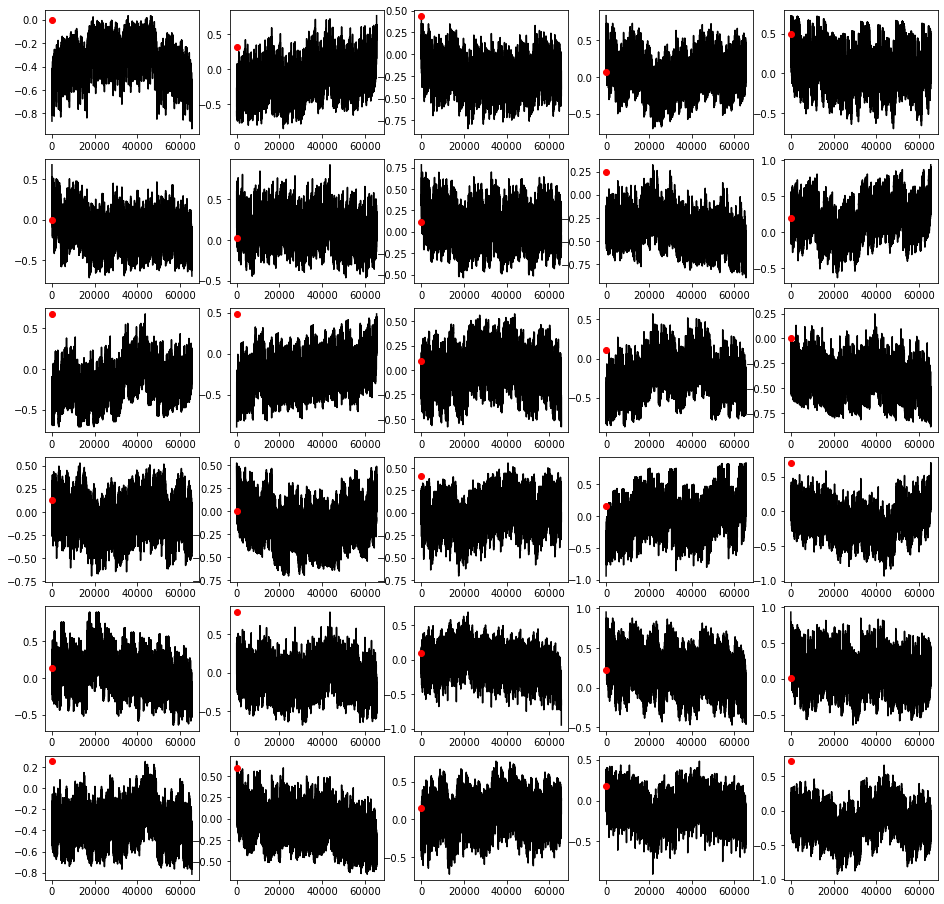

In [301]:
figsize=(16,16)
fig1, axs = plt.subplots(6, 5, figsize=figsize, constrained_layout=False)
axs = axs.ravel()
# fig1.ylim([-1, 1])

for i in range(30):
    axs[i].plot(ab[i],'k-')
    axs[i].plot(bc[i],'ro')

In [279]:
print(shape(gf))

(65536,)


In [41]:
def computeNewScore(eatenM,scoreM,score):
    for i in range(len(ar_0)):
        for j in range(len(zc)):
            listOfAllPossibleScores = (eatenM[i].flatten()*scoreM[j].flatten()).sum()
#         print(score)
        ascore=score.new_s.loc[i]
        print(type(ascore))
#     listOfAllPossibleScores = (ar_0[i].flatten()*zc[j].flatten()).sum()
        a = len([listOfAllPossibleScores])
        percentRank=(listOfAllPossibleScores[i]>ascore[i]).sum()/a
    return percentRank,listOfAllPossibleScores

In [47]:
ar_0[1]

array([-0.604571, -0.699851, -0.842034,  0.746485,  0.334026, -0.849186,
       -0.332103, -0.247995,  0.39767 , -0.697837,  0.71496 , -0.472547,
       -0.624549, -0.921322, -0.126505,  0.759653])

In [51]:
df0_0001s.new_s[1]

0.31657399999999997

In [58]:
len(zc)

65536

In [70]:
ab = ((ar_0[5].flatten()*zc[5].flatten()).sum())

In [218]:
bc=[]
for i in range(len(df0_0001s.new_s)):
    b=(df0_0001s.new_s[i].sum())
    bc.append(b)

In [219]:
ab

[-0.865079,
 -0.8014315000000001,
 -0.7858773750000001,
 -0.7891942500000001,
 -0.699489125,
 -0.702402875,
 -0.75074075,
 -0.7074815,
 -0.6610235,
 -0.677725625,
 -0.6998495,
 -0.622411125,
 -0.764522625,
 -0.6879190000000001,
 -0.79965025,
 -0.79686725,
 -0.699489125,
 -0.6358416250000001,
 -0.6202875000000001,
 -0.6236043750000001,
 -0.6004605000000001,
 -0.60337425,
 -0.651712125,
 -0.608452875,
 -0.625886875,
 -0.642589,
 -0.664712875,
 -0.5872745,
 -0.682809875,
 -0.6062062500000001,
 -0.7179375000000001,
 -0.7151545,
 -0.6610235,
 -0.597376,
 -0.581821875,
 -0.58513875,
 -0.5757832500000001,
 -0.578697,
 -0.627034875,
 -0.583775625,
 -0.574995625,
 -0.59169775,
 -0.613821625,
 -0.5363832500000001,
 -0.5977395,
 -0.521135875,
 -0.632867125,
 -0.630084125,
 -0.764522625,
 -0.700875125,
 -0.6853210000000001,
 -0.6886378750000001,
 -0.585976625,
 -0.5888903750000001,
 -0.63722825,
 -0.5939690000000001,
 -0.674796375,
 -0.6914985,
 -0.713622375,
 -0.6361840000000001,
 -0.772195625,
 

In [220]:
bc

[0.0,
 0.31657399999999997,
 0.441171,
 0.07081597368421053,
 0.5010305,
 0.0,
 0.022384457142857143,
 0.112989,
 0.24193449999999997,
 0.19769765573770492,
 0.6727435,
 0.483825,
 0.086898625,
 0.10349159999999999,
 0.0,
 0.13373882608695653,
 0.0,
 0.41250699999999996,
 0.15721042857142858,
 0.6992659999999999,
 0.13303870175438595,
 0.7929919999999999,
 0.09416873076923077,
 0.22355732142857146,
 0.012122486486486487,
 0.257315,
 0.5953149999999999,
 0.14914964864864866,
 0.182586875,
 0.7152324999999999]

In [84]:
(ab>bc).sum()/len(zc)

1.52587890625e-05

In [75]:
(ab>bc).sum()/len(zc[5])

0.25

In [92]:
df0_0001s.new_s[1]

0.31657399999999997

In [186]:
bc

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [192]:
df0_0001s.new_s[29].sum()

0.7152324999999999

In [197]:
len(df0_0001s.new_s)

30

In [222]:
listOfAllPossibleScores = []
scores = []
for i in range(len(ar_0)):
    for j in range(len(zc)):
        ab=(ar_0[i].flatten()*zc[j].flatten()).sum()
        listOfAllPossibleScores.append(ab)
for k in range(len(df0_0001s.new_s)):
    bc = (df0_0001s.new_s[k].sum())
    scores.append(bc)
# percentRank=(((ab>scores).sum())/(len(ab)))

In [230]:
ab

-0.181187

In [250]:
listOfAllPossibleScores[1]

-0.8014315000000001

In [249]:
((listOfAllPossibleScores>bc).sum())/len(listOfAllPossibleScores)

0.00081787109375

In [270]:
for i in range(len(ar_0)):
    for k in range(len(df0_0001s.new_s)):
        print(((listOfAllPossibleScores[i]>bc).sum())/len(listOfAllPossibleScores))

TypeError: object of type 'numpy.float64' has no len()

In [284]:
def computeNewScore(eatenM,scoreM,score):
    listOfAllPossibleScores = []
#     scores = []
    for i in range(len(eatenM)):
        for j in range(len(scoreM)):
            ab=(ar_0[i].flatten()*zc[j].flatten()).sum()
            listOfAllPossibleScores.append(ab)
#     for k in range(len(score)):
#         bc = (score[k].sum())
#         scores.append(bc)
        percentRank=(((listOfAllPossibleScores[i]>score.loc[i]).sum())/(len(listOfAllPossibleScores)))
    return percentRank#,listOfAllPossibleScores     

In [285]:
computeNewScore(ar_0,zc,df0_0001s.new_s)

KeyboardInterrupt: 

In [292]:
def computeNewScore(eatenM,scoreM,score):
    listOfAllPossibleScores = []
    percentRank = []
    for i in range(len(eatenM)):
        for j in range(len(scoreM)):
            ab=(ar_0[i].flatten()*zc[j].flatten()).sum()
            listOfAllPossibleScores.append(ab)
#     for k in range(len(score)):
#         bc = (score[k].sum())
#         scores.append(bc)
        abc=(((listOfAllPossibleScores[i]>score.loc[i]).sum())/(len(listOfAllPossibleScores)))
        percentRank.append(abc)
#     allScores = []
#     percentRank =[]
#     for i in range(len(scoreM)):
#         for j in range(len(eatenM)):
#             cal = (scoreM[i].flatten()*eatenM[j].flatten()).sum()
#             allScores.append(cal)
# #             print(type(allScores))
# #             print(((allScores[j]>score[j]).sum())/len(allScores))
#         percent=(((allScores[i]>score.loc[i]).sum())/(len(allScores)))
#         percentRank.append(percent)
    return percentRank #,allScores[1]#listOfAllPossibleScores,percentRank

In [293]:
computeNewScore(ar_0,zc,df0_0001s.new_s)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [181]:
for i in range(len(ar_0)):
    computeNewScore(ar_0[i],zc[i],df0_0001s.new_s[i])

IndexError: invalid index to scalar variable.

In [116]:
percentRank

NameError: name 'percentRank' is not defined